## 주성분 분석
- 상관관계가 있는 고차원 자료를 자료의 변동을 최대한 보존하는 저차원 자료로 변환시키는 방법 
- 차원을 축소하여 축소된 차원이 전체를 설명할 수 있게 한다. 
- 하지만, 변수가 하나가 얼마만큼의 중요도와 의미를 갖는지는 알기가 어렵다. - 원인분석에는 부적절
- 차원을 줄이는 이유는 차원이 높으면 시각화하기가 그리기 어렵기 때문이다. 

- 차원을 2차원으로 줄일 수 없다면, 주성분 분석을 하는 것이 크게 의미가 없다

In [3]:
library(datasets)
data(USArrests)

#### 데이터 탐색

In [2]:
?USArrests
summary(USArrests) 

#각 변수의 차이가 크다. 따라서 정규화 혹은 주성분 분석

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

#### 탐색적 시각화

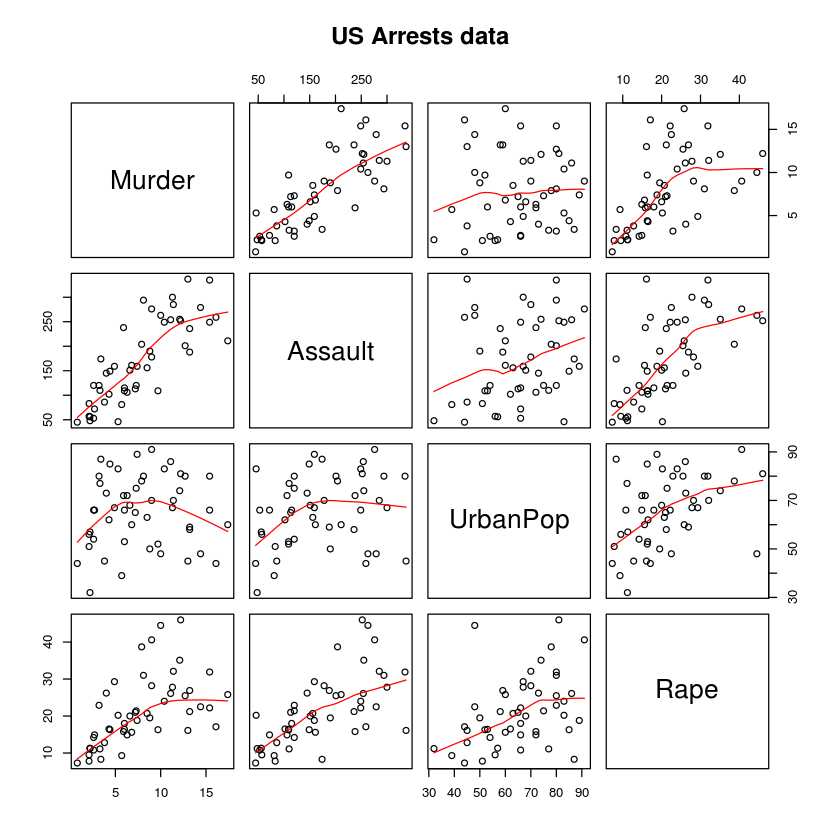

In [5]:
pairs(USArrests, panel = panel.smooth, 
      main = "US Arrests data")

#murder 와 Assault가 같이 증가.
# murder는 인구와 상관없이 일어나는 강력범죄다

#### 주성분 분석 결과 파악하기

In [14]:
?princomp
#아예 다른 princomp라는 클래스 이용

In [8]:
p1 <- princomp(USArrests, cor = TRUE)
p1

# Standard deviations 표준편차는 작을 수록 좋다. 
# comp.4가 가장 좋다. 

Call:
princomp(x = USArrests, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494 

 4  variables and  50 observations.

In [9]:
summary(p1)

# Proportion of Variance - 설명력 = comp1, comp2 로 86%정도 설명가능하다.
# 기존 4차원의 자료를 2차원으로 줄인다. 
# 차원을 줄이는 이유 - 차원이 높으면 시각화하기가 그리기 어렵다. 

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

#### 주성분의 로딩벡터

In [10]:
loadings(p1)

# 각각의 주성분이 얼마나 의미가 있는지 나타낸다.
# 절대값을 취한 값이 높을 수록 높은 상관관계를 나타낸다. 

# 결과
# Comp1이 Murder를 음의 방향에서 보고 있다. 
# Comp2는 UrbanPop을 음의 방향에서 강하게 보고 있다.


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder   -0.536  0.418 -0.341  0.649
Assault  -0.583  0.188 -0.268 -0.743
UrbanPop -0.278 -0.873 -0.378  0.134
Rape     -0.543 -0.167  0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

#### 주성분 개수의 선택 기준
- 주성분의 분산의 감소가 급격하게 줄어들어 주성분의 개수를 늘릴 때 얻게되는 정보의 양이 상대적으로 미미한 지점에서 주성분의 개수를 정하는 것이 하나의 방법이다. 
- 주성분들이 설명하는 총 분산의 비율이 70~90% 사이가 되는 주성분의 개수를 선태갛는 방법을 사용하기도 한다. 

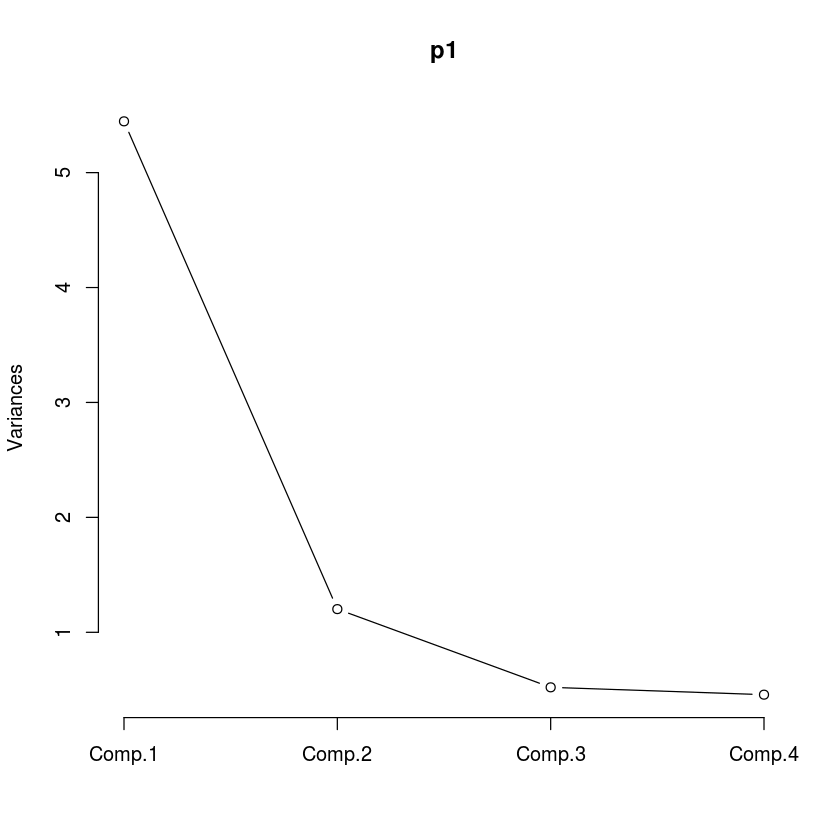

In [35]:
screeplot(p1, npcs=4, type="lines")

#### [주성분 결과 시각화]

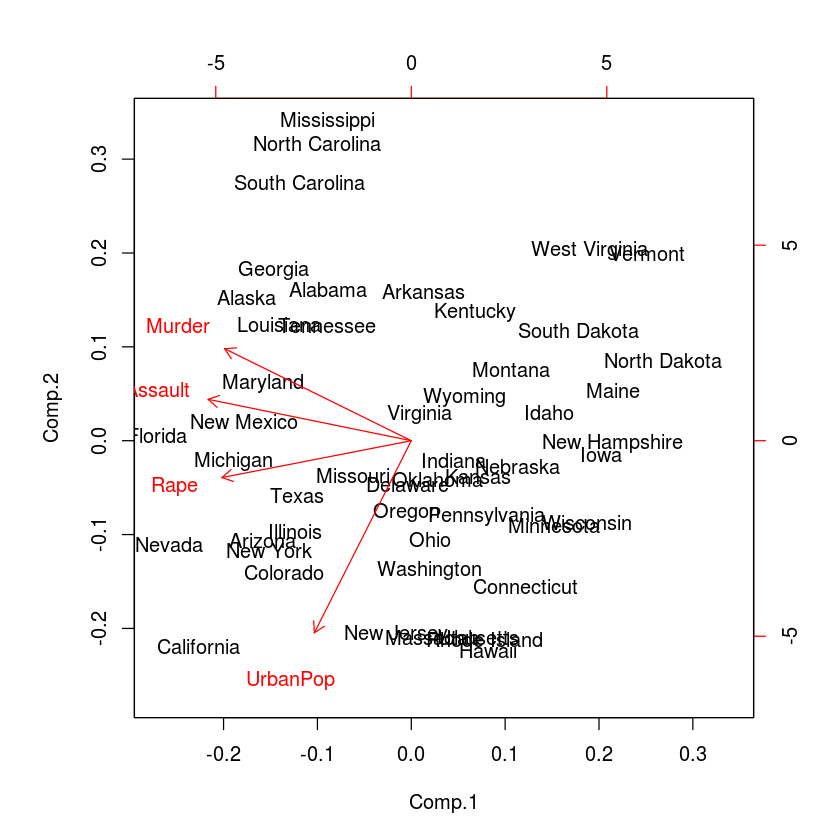

In [16]:
biplot(p1)
#화살표에 근처에 있는 지역이 화살표의 해당하는 특성이 강하게 나타나는 지역이다.

#### 예측값과 실제값 비교

In [34]:
predict(p1)[,1]
USArrests#### 예측값과 실제값 비교

predict(p1)[,1]
heptathlon[,1]#### 예측값과 실제값 비교

predict(p1)[,1]
heptathlon[,1][,1]

Joyner-Kersee (USA)          John (GDR)        Behmer (GDR)  Sablovskaite (URS) 
        -4.73644855         -3.28440666         -3.04070072         -1.59214658 
  Choubenkova (URS)        Schulz (GDR)       Fleming (AUS)       Greiner (USA) 
        -1.61876350         -1.20977434         -1.20996826         -1.00140330 
   Lajbnerova (CZE)       Bouraga (URS)       Wijnsma (HOL)     Dimitrova (BUL) 
        -0.61564151         -0.81676153         -0.58675246         -1.15127240 
     Scheider (SWI)         Braun (FRG)  Ruotsalainen (FIN)        Yuping (CHN) 
        -0.03088395         -0.01831843          0.06751278         -0.11797365 
        Hagger (GB)         Brown (USA)       Mulliner (GB)    Hautenauve (BEL) 
         0.26570642          0.56258410          1.31010266          1.29504614 
       Kytola (FIN)      Geremias (BRA)       Hui-Ing (TAI)      Jeong-Mi (KOR) 
         1.65452526          2.30639362          3.27988022          3.36476324 
        Launa (PNG) 
         6.92470138

[1] 13.2 10.0  8.1  8.8  9.0  7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2  2.2
[16]  6.0  9.7 15.4  2.1 11.3  4.4 12.1  2.7 16.1  9.0  6.0  4.3 12.2  2.1  7.4
[31] 11.4 11.1 13.0  0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 13.2 12.7  3.2  2.2
[46]  8.5  4.0  5.7  2.6  6.8

### 연습문제

In [ ]:
library(HSAUR)

In [21]:
data(heptathlon)

In [22]:
str(heptathlon)

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


In [24]:
p1 <- princomp(heptathlon, cor = TRUE)
p1

Call:
princomp(x = heptathlon, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
2.33372393 1.09623192 0.72182793 0.67615707 0.49697892 0.27157857 0.22144292 
    Comp.8 
0.06327956 

 8  variables and  25 observations.

In [25]:
summary(p1)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.3337239 1.0962319 0.72182793 0.67615707 0.49697892
Proportion of Variance 0.6807834 0.1502156 0.06512945 0.05714855 0.03087351
Cumulative Proportion  0.6807834 0.8309990 0.89612842 0.95327697 0.98415048
                            Comp.6      Comp.7       Comp.8
Standard deviation     0.271578567 0.221442919 0.0632795567
Proportion of Variance 0.009219365 0.006129621 0.0005005378
Cumulative Proportion  0.993369841 0.999499462 1.0000000000

In [27]:
loadings(p1)


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
hurdles   0.407 -0.178               -0.113  0.795 -0.382       
highjump -0.339  0.264 -0.367 -0.679               -0.439 -0.145
shot     -0.332 -0.273  0.677 -0.123 -0.494        -0.223 -0.203
run200m   0.370  0.240        -0.363 -0.665         0.457  0.124
longjump -0.412         0.141 -0.110  0.198  0.572  0.602 -0.252
javelin         -0.836 -0.471 -0.120 -0.124         0.170 -0.116
run800m   0.338 -0.239  0.395 -0.604  0.491 -0.133  0.105  0.194
score    -0.426                                            0.893

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125
Cumulative Var  0.125  0.250  0.375  0.500  0.625  0.750  0.875  1.000

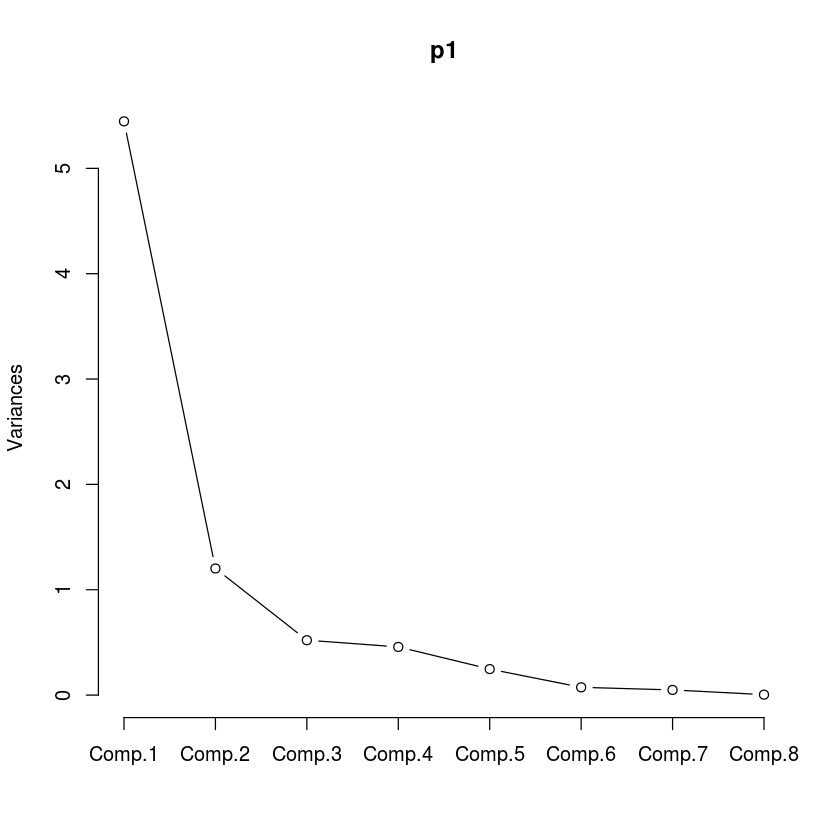

In [29]:
screeplot(p1, npcs=8screeplot(p1, npcs=4, type="lines"), type="lines")

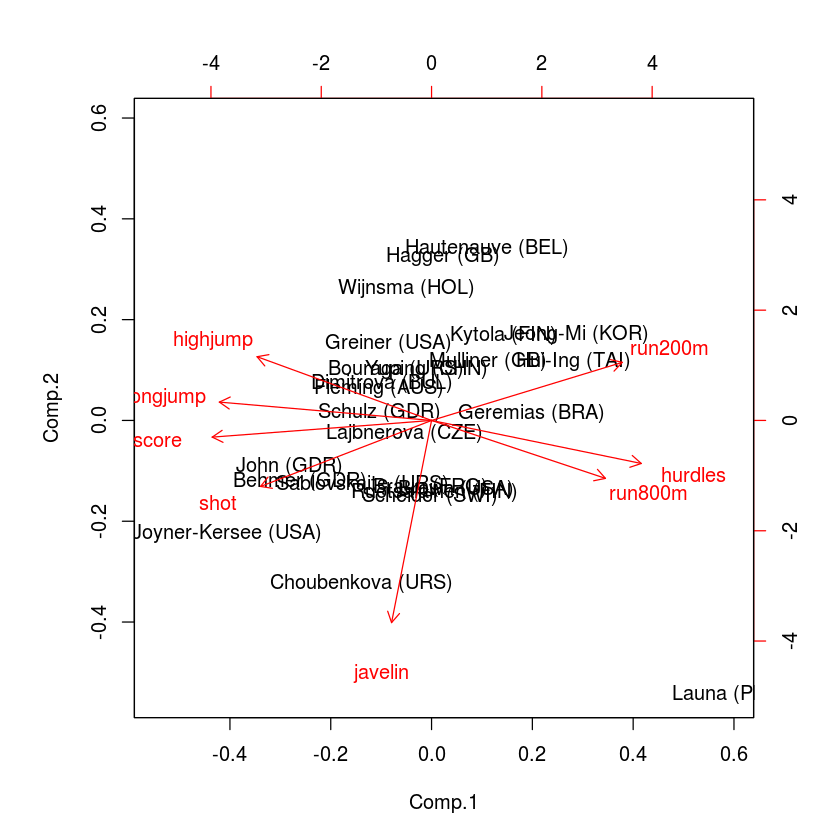

In [31]:
biplot(p1)